In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.1


In [24]:
# import tensorflow as tf
# from tensorflow.keras import layers, models
# from tensorflow.keras.applications.vgg16 import VGG16
# from sklearn.utils import shuffle
# from sklearn.model_selection import train_test_split

import random
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Restrict TensorFlow to only use the fourth GPU
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')

        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [4]:
df = pd.read_csv("tracks.csv")
df

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4


In [5]:
df['release_date']=pd.to_datetime(df['release_date']).dt.year
df

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4


In [6]:
df = df[['popularity', 'duration_ms', 'release_date', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']]
df

,popularity,duration_ms,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,6,126903,1922,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3
1,0,98200,1922,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1
2,0,181640,1922,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5
3,0,176907,1922,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3
4,0,163080,1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,50,258267,2020,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
586668,72,153293,2020,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
586669,70,187601,2020,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4
586670,58,142003,2021,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4


In [7]:
# popularity = df.pop('popularity')

In [9]:
x = df.iloc[:, 1:]  # The first to second-last columns are the features
y = df.iloc[:, 0]   # The last column is the ground-truth label
print(np.unique(y))
print(x.shape)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100]
(586672, 14)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.20, random_state=42)

In [11]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [12]:
print(X_train_std.shape)
print(X_test_std.shape)
print(y_train.shape)
print(y_test.shape)

(469337, 14)
(117335, 14)
(469337,)
(117335,)


In [13]:
dataset = tf.data.Dataset.from_tensor_slices((X_train_std, y_train))

In [14]:
for feat, targ in dataset.take(5):
    print ('Features: {}, Target: {}'.format(feat, targ))

Features: [-0.18212024  0.01924028  0.82083797 -0.62282641 -1.48284504 -0.74284285
  0.71944645 -0.41074826  0.78512956 -0.42504909 -0.83242032  0.47614965
 -0.9477936   0.26816363], Target: 21
Features: [-0.52434972  1.20153885  0.44150463  1.17943153 -0.914787    1.13045774
 -1.38995751 -0.39189167  0.10292825 -0.42505801 -0.16312034  0.99620943
 -1.03807073  0.26816363], Target: 26
Features: [-0.63744427 -0.90032527  0.42344114  0.17508955 -0.34672895  0.11982258
  0.71944645 -0.36083377  0.47555922 -0.4244625   1.66864803  1.20966681
  0.16292434  0.26816363], Target: 47
Features: [ 0.01022737  1.15775001  1.54337766  1.08018825  1.35744519  0.95674561
  0.71944645 -0.36249759 -1.23338372 -0.42504625 -0.21189524  1.48522087
  0.72519022  0.26816363], Target: 36
Features: [ 0.50550568  0.54470631 -1.61773348  1.66373873 -0.914787    1.10078519
  0.71944645 -0.02973436 -1.29006949  2.08432536 -0.06015111 -1.38287002
  0.61982208  0.26816363], Target: 52


In [15]:
train_dataset = dataset.shuffle(len(df)).batch(64)

In [16]:
def get_compiled_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(14, activation='relu'),
        tf.keras.layers.Dense(28, activation='relu'),
        tf.keras.layers.Dense(28, activation='relu'),
        tf.keras.layers.Dense(14, activation='relu'),
        tf.keras.layers.Dense(1)
    ])

    model.compile(optimizer='adam',
                loss=tf.keras.losses.MeanSquaredError(),
                metrics=['MeanAbsoluteError'])
    return model

In [17]:
model = get_compiled_model()
model.fit(train_dataset, epochs=15)

Epoch 1/15

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

7334/7334 [==============================] - 14s 2ms/step - loss: 215.5484 - mean_absolute_error: 11.1688
Epoch 2/15
7334/7334 [==============================] - 14s 2ms/step - loss: 191.8083 - mean_absolute_error: 10.5085
Epoch 3/15
7334/7334 [==============================] - 14s 2ms/step - loss: 187.6803 - mean_absolute_error: 10.3677
Epoch 4/15
7334/7334 [==============================] - 14s 2ms/step - loss: 185.3252 - mean_absolute_error: 10.2891
Epoch 5/15
7334/7334 [==================

In [18]:
predict = model(X_test_std).numpy()[:,0]

y_test_v = y_test.values

diff = abs(y_test_v-predict)
print(diff)

[ 3.76601219  8.44329834 14.55782318 ...  0.69070053  8.56646538
 19.8371582 ]


No handles with labels found to put in legend.


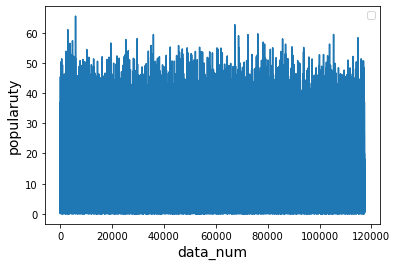

In [19]:
import matplotlib.pyplot as plt
plt.xlabel("data_num", fontsize=14)
plt.ylabel("popularuty", fontsize=14)

# plt.plot(predict)
plt.plot(diff)

plt.legend()
plt.show()

In [20]:
with open('your_file.txt', 'w') as f:
    for item in diff:
        f.write("%s\n" % item)

In [21]:
diff.shape

(117335,)

In [22]:
model.evaluate(X_test_std, y_test.values)

3667/3667 [==============================] - 5s 1ms/step - loss: 180.4709 - mean_absolute_error: 10.1451


[180.470947265625, 10.145125389099121]

In [29]:
metrics.mean_absolute_error(y_test_v,predict)

10.145122058076517